In [1]:
import sys
sys.path.append('/mnt/c/Users/wayne/tvb/tvbtools/')
from tvbtools.signaltools import SignalToolkit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
my_layout = widgets.Layout()
plt.style.use('ggplot')
import os

In [2]:
node_names = ['aCNG-L', 'aCNG-R','mCNG-L','mCNG-R','pCNG-L','pCNG-R', 'HIP-L','HIP-R','PHG-L','PHG-R','AMY-L','AMY-R', 'sTEMp-L','sTEMp-R','mTEMp-L','mTEMp-R']
fs = 81920.0
samplinginterval = 1/fs
t = np.arange(0, 1, samplinginterval)
grps = ['SNC','NC','MCI','AD']
col = ["#66CDAA","#4682B4","#AB63FA","#FFA15A"]
path = '/mnt/c/Users/Wayne/tvb/stat_data/Gc_Go.xlsx'
coData = pd.read_excel(path, index_col=0)

def read_data(grp, caseid):
    gm = np.round(coData.loc[caseid, "Gc"], 3)
    filename = '/mnt/d/data/LFP/'+str(grp)+'/'+str(caseid)+'/'+str(caseid)+'_'+str(gm)+'.csv'
    subject = SignalToolkit(filename, 81920.)
    df = subject.data_reader()

    cutoff_low = 2.
    cutoff_high = 10.
    spikesparas = {'prominence': 0.5, 'height': .5}
    valleysparas= {'prominence': 0.2, 'width':2000, 'height': -0.5}
    spikesparas_af= {'prominence': 0.2, 'width':2000, 'height': 0.}
    valleysparas_af = {'prominence': 0.2, 'width':2000, 'height': -0.5}

    pcgl=subject.signal_package(data=df, channel_num = 4, label='pcg_left', low=cutoff_low, high=cutoff_high, spikesparas=spikesparas, valleysparas=valleysparas, spikesparas_af=spikesparas_af, valleysparas_af = valleysparas)
    pcgr=subject.signal_package(data=df, channel_num = 5, label='pcg_right', low=cutoff_low, high=cutoff_high, spikesparas=spikesparas, valleysparas=valleysparas, spikesparas_af=spikesparas_af, valleysparas_af=valleysparas_af)

    fig = plt.figure(figsize=(15,5))
    axes = fig.add_subplot(111)
    axes.set_title(f"{grp}_{caseid}")
    subject.signal_af(**pcgl, axes=axes)
    subject.signal_af(**pcgr, axes=axes)
    plt.legend()
    plt.show()

    # freq
    pcgl_freq_gamma = subject.freq_count(pcgl["spikeslist"])
    pcgr_freq_gamma = subject.freq_count(pcgr["spikeslist"])
    pcgl_freq_theta = subject.freq_count(pcgl["spikeslist_af"])
    pcgr_freq_theta = subject.freq_count(pcgr["spikeslist_af"])

    # amp
    pcgl_amp_gamma = subject.amp_count(**pcgl, mode="p2v")
    pcgr_amp_gamma = subject.amp_count(**pcgr, mode="p2v")
    pcgl_amp_theta = subject.amp_count(data=pcgl["after_filtered"], spikeslist=pcgl["spikeslist_af"], valleyslist=pcgl["valleyslist_af"], mode="p2v")
    pcgr_amp_theta = subject.amp_count(data=pcgr["after_filtered"], spikeslist=pcgr["spikeslist_af"], valleyslist=pcgr["valleyslist_af"], mode="p2v")

    # delay
    pcg_delay = subject.phase_delay(pcgl["after_filtered"], pcgr["after_filtered"], pcgl["spikeslist_af"], pcgl["valleyslist_af"], pcgr["spikeslist_af"], pcgr["valleyslist_af"], mode = "SI")

    res_dict = {"group":grp, 
    "caseid":caseid, 
    "pcgl_freq_gamma":pcgl_freq_gamma,
    "pcgr_freq_gamma":pcgr_freq_gamma,
    "pcgl_freq_theta":pcgl_freq_theta,
    "pcgr_freq_theta":pcgr_freq_theta,
    "pcgl_amp_gamma":pcgl_amp_gamma,
    "pcgr_amp_gamma":pcgr_amp_gamma,
    "pcgl_amp_theta":pcgl_amp_theta,
    "pcgr_amp_theta":pcgr_amp_theta,
    "pcg_delay":pcg_delay}
    return res_dict

    # fig = plt.figure(figsize=(15,5))
    # axes = fig.add_subplot(111)
    # for i in range(16):
    #     _, power = subject.psd(df[:,i], sampling_interval = 1/fs, visual=True, xlim=100., axes=axes, label=f"{node_names[i]}")
    #     if i == 4:
    #         highest_pcg_left = np.argmax(power)
    #     if i == 5:
    #         highest_pcg_right = np.argmax(power)
    # axes.set_title(f"{grp}_{caseid}")
    # plt.savefig(f"/mnt/c/Users/wayne/tvb/psdres/{grp}_{caseid}.png", dpi=300)
    # return highest_pcg_left, highest_pcg_right

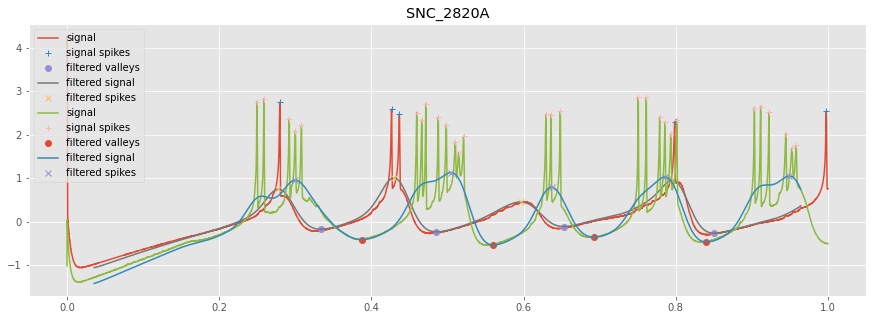

{'group': 'SNC', 'caseid': '2820A', 'pcgl_freq_gamma': 5, 'pcgr_freq_gamma': 28, 'pcgl_freq_theta': 4, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 2.89815382256282, 'pcgr_amp_gamma': 2.845971200408957, 'pcgl_amp_theta': 1.088629884893498, 'pcgr_amp_theta': 1.5431773763086947, 'pcg_delay': -0.0320220947265625}


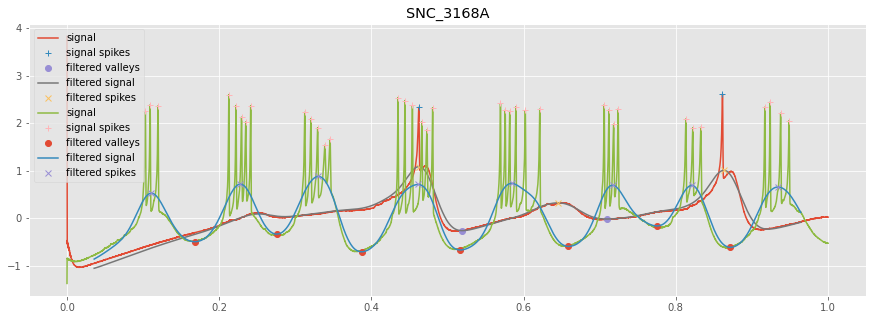

{'group': 'SNC', 'caseid': '3168A', 'pcgl_freq_gamma': 2, 'pcgr_freq_gamma': 36, 'pcgl_freq_theta': 3, 'pcgr_freq_theta': 8, 'pcgl_amp_gamma': 2.869201439811074, 'pcgr_amp_gamma': 2.761080973439903, 'pcgl_amp_theta': 1.1078259798191856, 'pcgr_amp_theta': 1.2406898752072493, 'pcg_delay': -0.3844482421875}


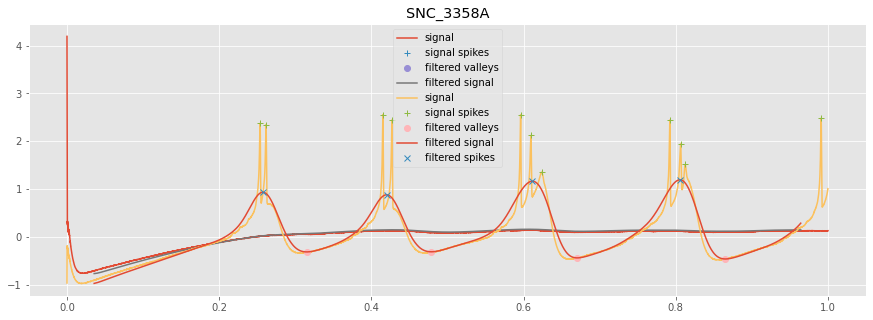

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'SNC', 'caseid': '3358A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 11, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 4, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.6733379332803597, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 1.4863119823725501, 'pcg_delay': 'N/A'}


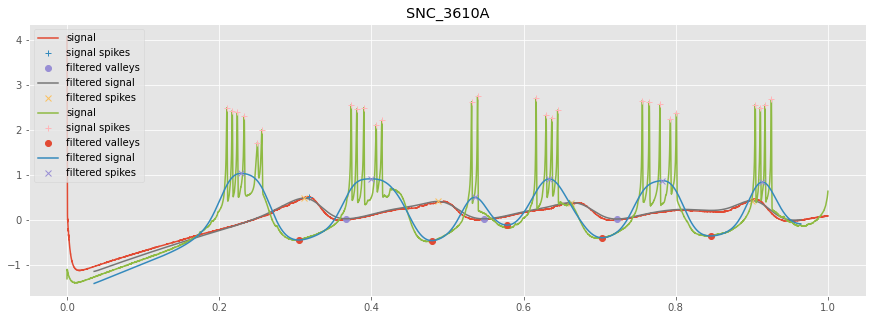

{'group': 'SNC', 'caseid': '3610A', 'pcgl_freq_gamma': 1, 'pcgr_freq_gamma': 26, 'pcgl_freq_theta': 4, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 1.0780605603865765, 'pcgr_amp_gamma': 2.90610568479878, 'pcgl_amp_theta': 0.5995892076013977, 'pcgr_amp_theta': 1.311909111688604, 'pcg_delay': -0.09914957682291667}


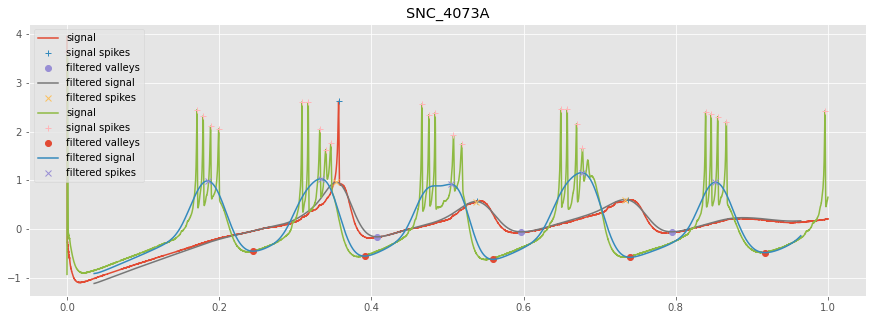

{'group': 'SNC', 'caseid': '4073A', 'pcgl_freq_gamma': 3, 'pcgr_freq_gamma': 24, 'pcgl_freq_theta': 3, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 1.555581112787712, 'pcgr_amp_gamma': 3.090550508820702, 'pcgl_amp_theta': 0.9805279101975484, 'pcgr_amp_theta': 1.594311417042083, 'pcg_delay': -0.20086263020833334}


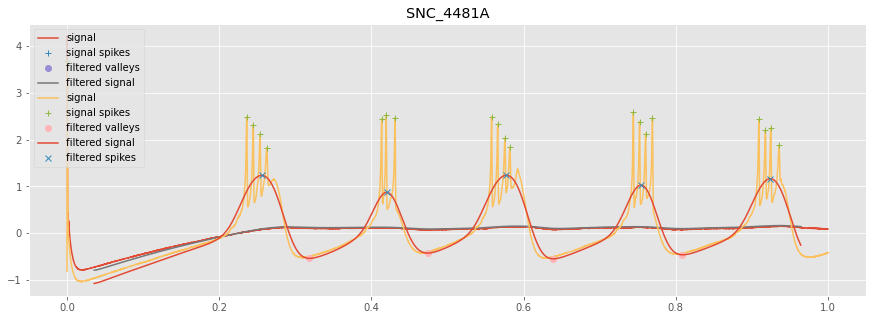

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'SNC', 'caseid': '4481A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 20, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 3.204552050948755, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 1.660329527875136, 'pcg_delay': 'N/A'}


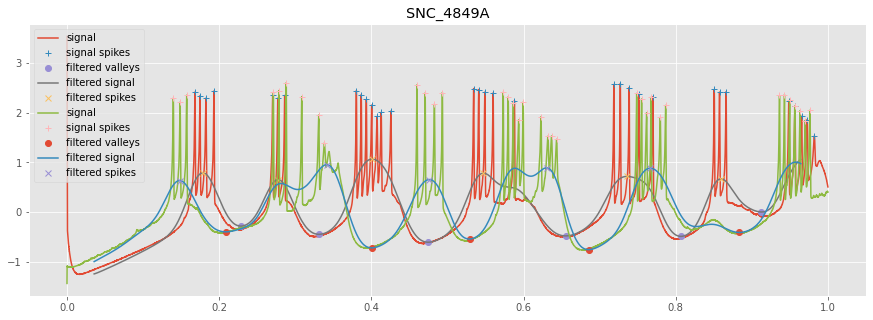

{'group': 'SNC', 'caseid': '4849A', 'pcgl_freq_gamma': 32, 'pcgr_freq_gamma': 35, 'pcgl_freq_theta': 6, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 2.789096827807589, 'pcgr_amp_gamma': 2.8750605444323747, 'pcgl_amp_theta': 1.2709046054621809, 'pcgr_amp_theta': 1.4358373065763148, 'pcg_delay': 0.044521484374999996}


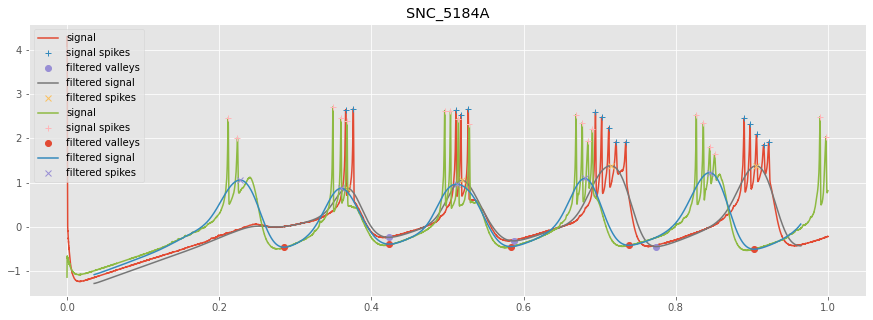

{'group': 'SNC', 'caseid': '5184A', 'pcgl_freq_gamma': 15, 'pcgr_freq_gamma': 19, 'pcgl_freq_theta': 4, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 2.8657025572489077, 'pcgr_amp_gamma': 2.846635187621921, 'pcgl_amp_theta': 1.574926502857777, 'pcgr_amp_theta': 1.5462293082142806, 'pcg_delay': -0.16732177734375}


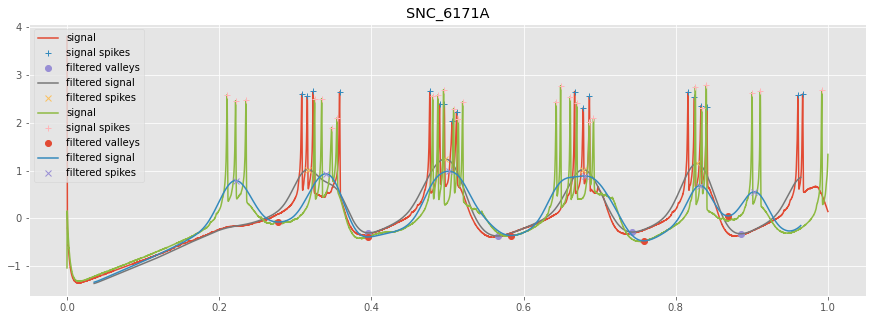

{'group': 'SNC', 'caseid': '6171A', 'pcgl_freq_gamma': 18, 'pcgr_freq_gamma': 25, 'pcgl_freq_theta': 4, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 2.80641072425862, 'pcgr_amp_gamma': 2.8490486814347413, 'pcgl_amp_theta': 1.559539981400691, 'pcgr_amp_theta': 1.245458840478355, 'pcg_delay': -0.1440399169921875}


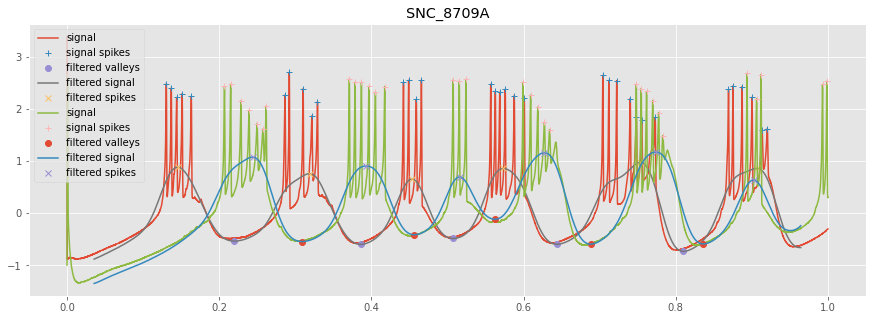

{'group': 'SNC', 'caseid': '8709A', 'pcgl_freq_gamma': 33, 'pcgr_freq_gamma': 33, 'pcgl_freq_theta': 6, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 2.878537625551179, 'pcgr_amp_gamma': 2.9709683999501917, 'pcgl_amp_theta': 1.4328913692612821, 'pcgr_amp_theta': 1.5298554800733952, 'pcg_delay': -0.06197021484375}


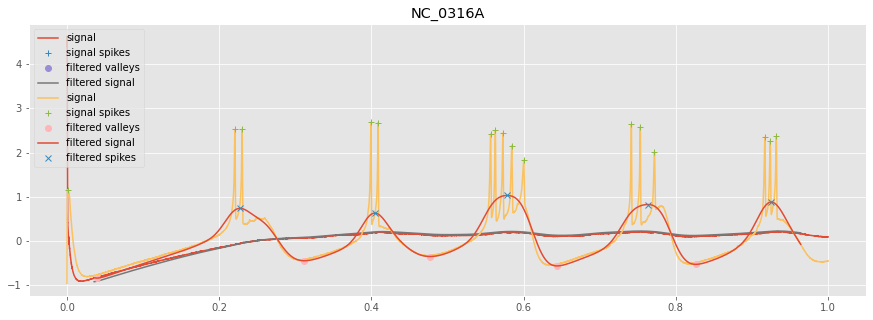

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'NC', 'caseid': '0316A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 16, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.7826035374128177, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 1.3179091913628223, 'pcg_delay': 'N/A'}


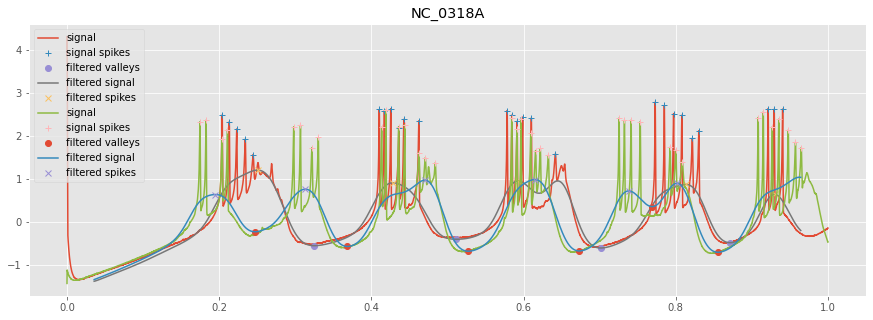

{'group': 'NC', 'caseid': '0318A', 'pcgl_freq_gamma': 26, 'pcgr_freq_gamma': 36, 'pcgl_freq_theta': 5, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 2.6179522760818577, 'pcgr_amp_gamma': 2.564074760840256, 'pcgl_amp_theta': 1.6100469600119744, 'pcgr_amp_theta': 1.302338553208158, 'pcg_delay': -0.1229034423828125}


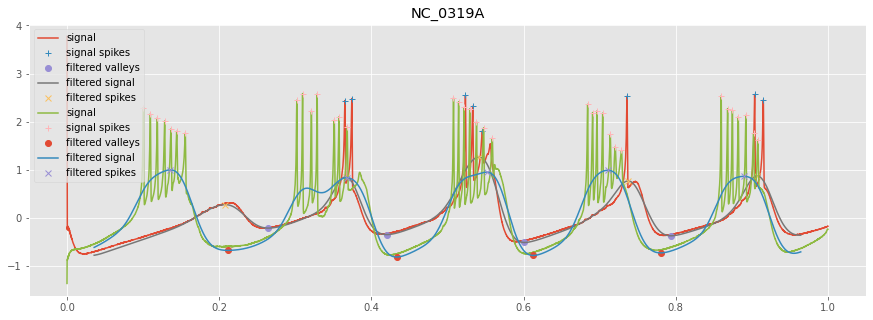

{'group': 'NC', 'caseid': '0319A', 'pcgl_freq_gamma': 8, 'pcgr_freq_gamma': 35, 'pcgl_freq_theta': 5, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 2.7796527597247835, 'pcgr_amp_gamma': 2.853744448076944, 'pcgl_amp_theta': 1.2029653915770142, 'pcgr_amp_theta': 1.687648635020659, 'pcg_delay': -0.021759033203125}


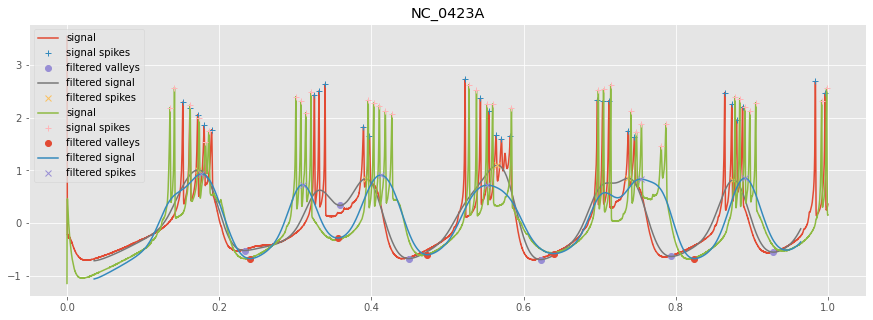

{'group': 'NC', 'caseid': '0423A', 'pcgl_freq_gamma': 27, 'pcgr_freq_gamma': 35, 'pcgl_freq_theta': 5, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 2.617448146341403, 'pcgr_amp_gamma': 2.747630201149377, 'pcgl_amp_theta': 1.4713474706138938, 'pcgr_amp_theta': 1.4298396194796683, 'pcg_delay': 0.10786376953125001}


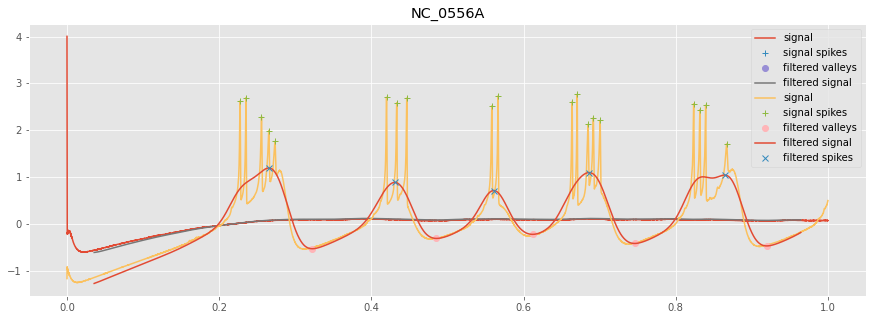

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'NC', 'caseid': '0556A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 19, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.9437792332494617, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 1.4608581198002277, 'pcg_delay': 'N/A'}


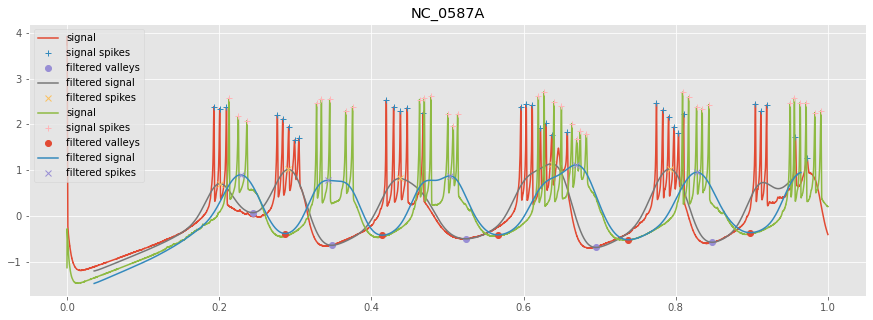

{'group': 'NC', 'caseid': '0587A', 'pcgl_freq_gamma': 31, 'pcgr_freq_gamma': 33, 'pcgl_freq_theta': 5, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 2.7144325647828644, 'pcgr_amp_gamma': 2.920271647360887, 'pcgl_amp_theta': 1.4714147950208112, 'pcgr_amp_theta': 1.4577728176919074, 'pcg_delay': -0.042612304687500005}


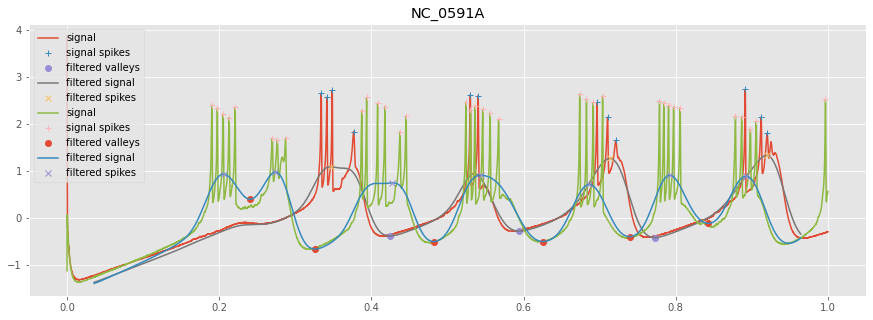

{'group': 'NC', 'caseid': '0591A', 'pcgl_freq_gamma': 12, 'pcgr_freq_gamma': 34, 'pcgl_freq_theta': 4, 'pcgr_freq_theta': 7, 'pcgl_amp_gamma': 2.8981379348943914, 'pcgr_amp_gamma': 2.6732160731670147, 'pcgl_amp_theta': 1.6232980124320122, 'pcgr_amp_theta': 1.2731414710621751, 'pcg_delay': -0.22934977213541666}


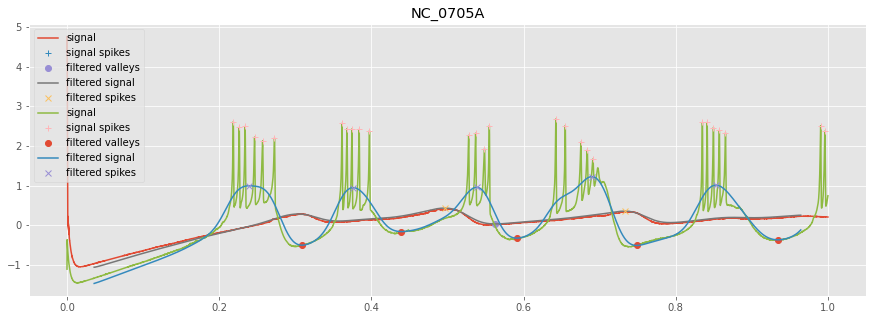

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'NC', 'caseid': '0705A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 27, 'pcgl_freq_theta': 2, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.8573039762602055, 'pcgl_amp_theta': 0.9498120224075399, 'pcgr_amp_theta': 1.515585620706677, 'pcg_delay': -0.25704345703125}


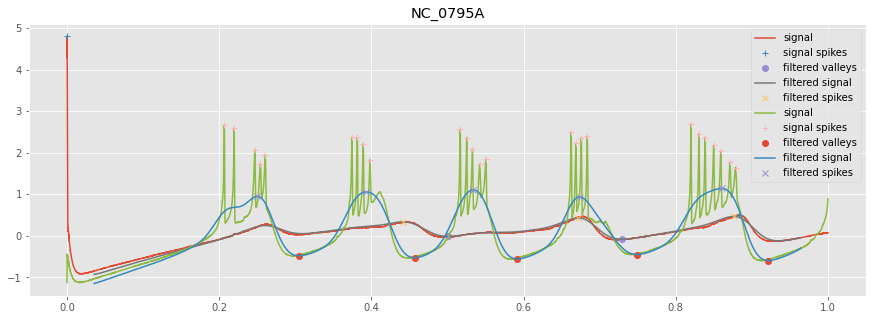

{'group': 'NC', 'caseid': '0795A', 'pcgl_freq_gamma': 2, 'pcgr_freq_gamma': 25, 'pcgl_freq_theta': 3, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 1.8648297681028239, 'pcgr_amp_gamma': 2.662910431911586, 'pcgl_amp_theta': 0.6416730856204118, 'pcgr_amp_theta': 1.6170360819100555, 'pcg_delay': -0.234637451171875}


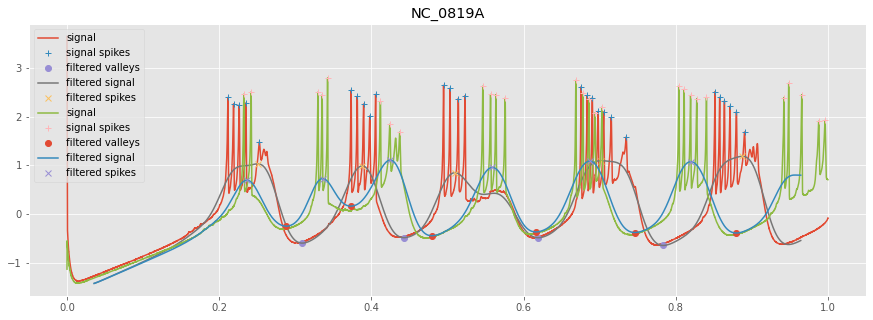

{'group': 'NC', 'caseid': '0819A', 'pcgl_freq_gamma': 27, 'pcgr_freq_gamma': 27, 'pcgl_freq_theta': 5, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 2.836773385826125, 'pcgr_amp_gamma': 2.8106699885236157, 'pcgl_amp_theta': 1.6448579129508685, 'pcgr_amp_theta': 1.3091655112522085, 'pcg_delay': -0.0734527587890625}


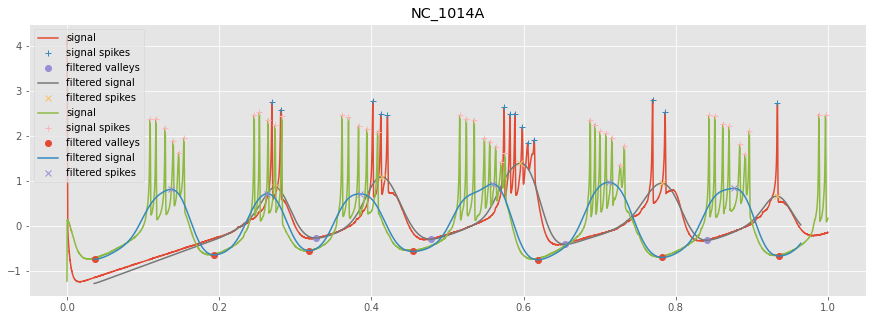

{'group': 'NC', 'caseid': '1014A', 'pcgl_freq_gamma': 14, 'pcgr_freq_gamma': 40, 'pcgl_freq_theta': 5, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 2.985752717250714, 'pcgr_amp_gamma': 2.779137572272196, 'pcgl_amp_theta': 1.5149222791199355, 'pcgr_amp_theta': 1.4813958129101479, 'pcg_delay': -0.179949951171875}


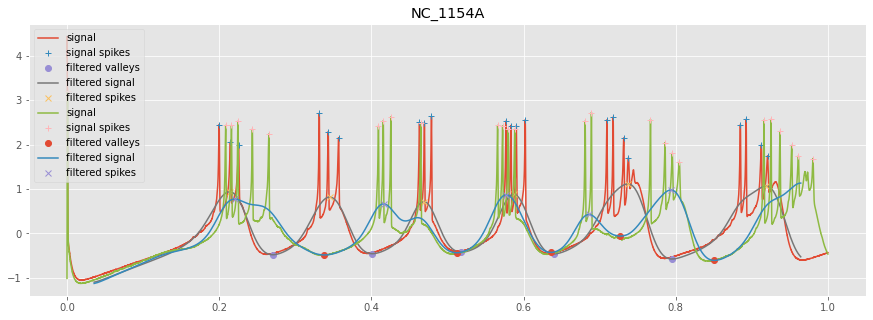

{'group': 'NC', 'caseid': '1154A', 'pcgl_freq_gamma': 21, 'pcgr_freq_gamma': 26, 'pcgl_freq_theta': 6, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 2.889115398597363, 'pcgr_amp_gamma': 3.021501519412396, 'pcgl_amp_theta': 1.4276039205767044, 'pcgr_amp_theta': 1.199245698076336, 'pcg_delay': -0.06832031250000001}


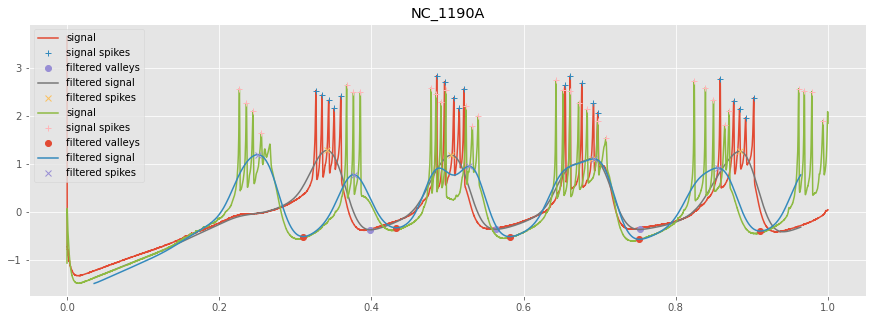

{'group': 'NC', 'caseid': '1190A', 'pcgl_freq_gamma': 20, 'pcgr_freq_gamma': 30, 'pcgl_freq_theta': 4, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 2.9143113729857566, 'pcgr_amp_gamma': 2.7466646254867304, 'pcgl_amp_theta': 1.7244979721010119, 'pcgr_amp_theta': 1.561136990130206, 'pcg_delay': -0.12675374348958332}


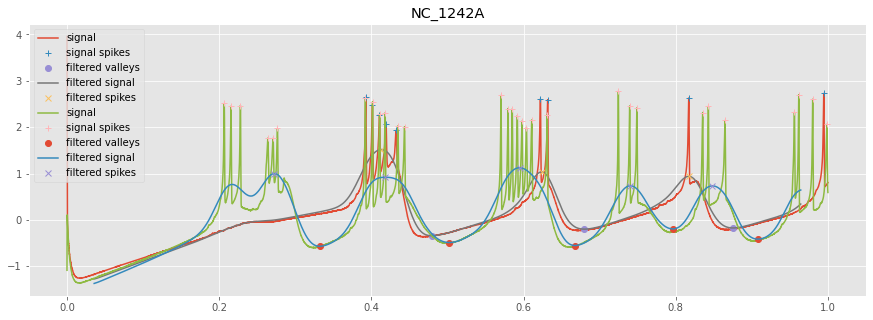

{'group': 'NC', 'caseid': '1242A', 'pcgl_freq_gamma': 9, 'pcgr_freq_gamma': 30, 'pcgl_freq_theta': 3, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 2.944671818929219, 'pcgr_amp_gamma': 2.7339060543897453, 'pcgl_amp_theta': 1.586563255280333, 'pcgr_amp_theta': 1.4433637990348196, 'pcg_delay': -0.18932291666666667}


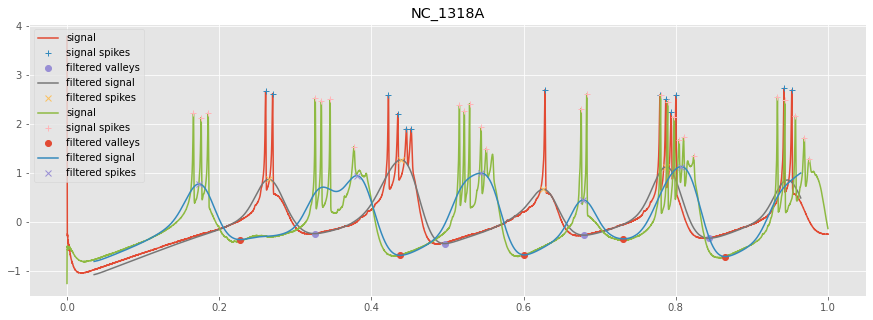

{'group': 'NC', 'caseid': '1318A', 'pcgl_freq_gamma': 13, 'pcgr_freq_gamma': 25, 'pcgl_freq_theta': 4, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 2.9035011276384535, 'pcgr_amp_gamma': 2.5858501049177893, 'pcgl_amp_theta': 1.3949605911140506, 'pcgr_amp_theta': 1.4209013300465354, 'pcg_delay': -0.08524169921875}


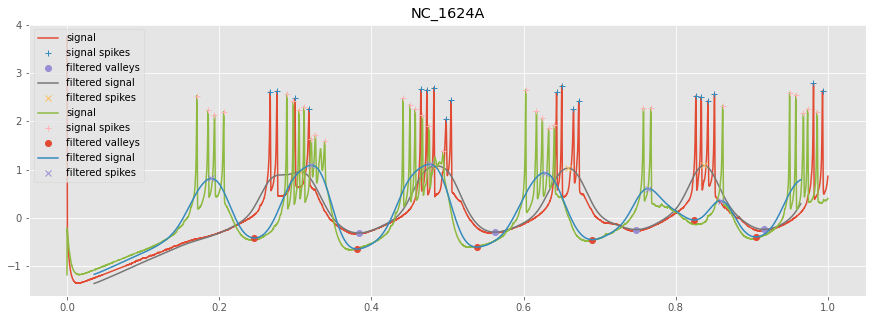

{'group': 'NC', 'caseid': '1624A', 'pcgl_freq_gamma': 19, 'pcgr_freq_gamma': 30, 'pcgl_freq_theta': 4, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 2.942863573562639, 'pcgr_amp_gamma': 2.7244686180271, 'pcgl_amp_theta': 1.454971207050262, 'pcgr_amp_theta': 1.3148922355059838, 'pcg_delay': -0.168115234375}


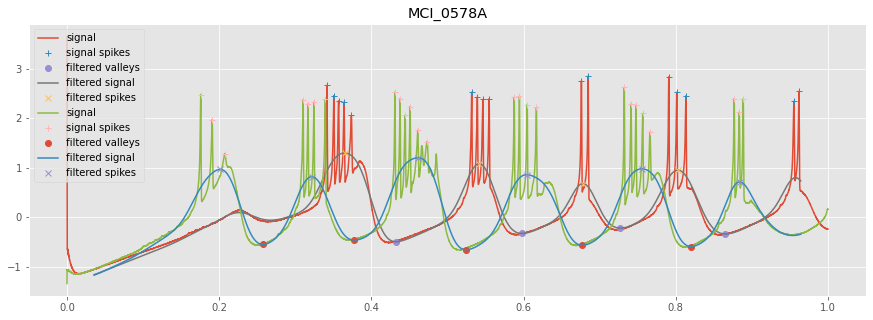

{'group': 'MCI', 'caseid': '0578A', 'pcgl_freq_gamma': 16, 'pcgr_freq_gamma': 25, 'pcgl_freq_theta': 4, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 2.8876501827903684, 'pcgr_amp_gamma': 2.814496437377064, 'pcgl_amp_theta': 1.4515855356372405, 'pcgr_amp_theta': 1.5903470188611522, 'pcg_delay': -0.1998016357421875}


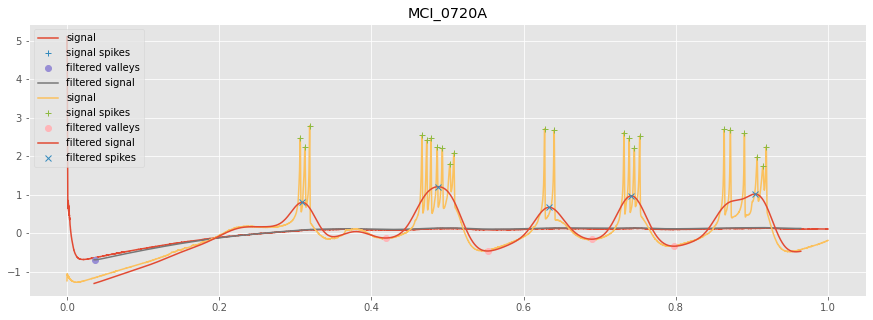

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'MCI', 'caseid': '0720A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 22, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.8513050132033766, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 1.3099244375819397, 'pcg_delay': 'N/A'}


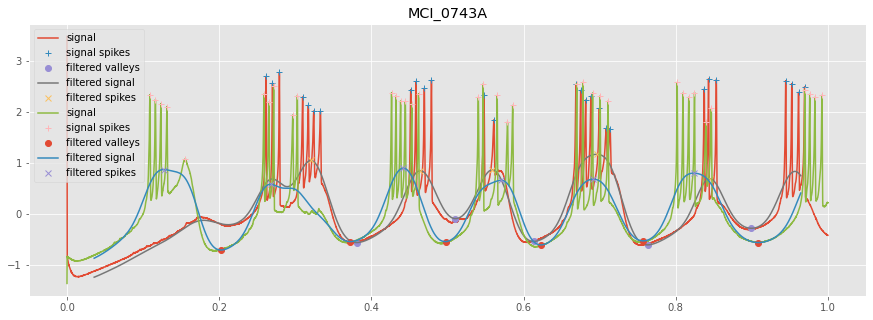

{'group': 'MCI', 'caseid': '0743A', 'pcgl_freq_gamma': 27, 'pcgr_freq_gamma': 36, 'pcgl_freq_theta': 5, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 2.776102046293053, 'pcgr_amp_gamma': 2.9034455245148547, 'pcgl_amp_theta': 1.4383115516188902, 'pcgr_amp_theta': 1.3598526053335405, 'pcg_delay': -0.15718994140625}


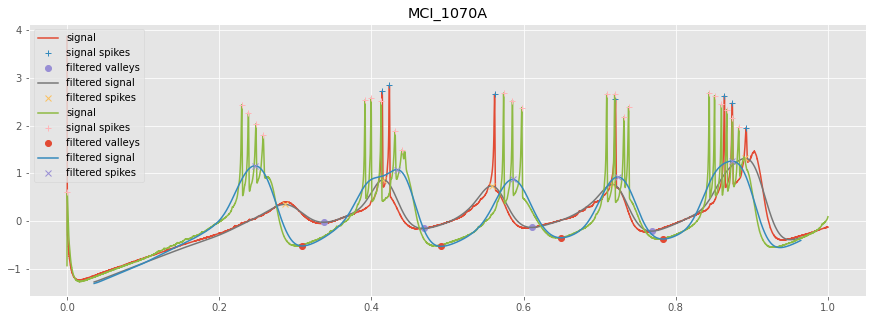

{'group': 'MCI', 'caseid': '1070A', 'pcgl_freq_gamma': 7, 'pcgr_freq_gamma': 23, 'pcgl_freq_theta': 5, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 2.786020168610774, 'pcgr_amp_gamma': 2.6844220892584656, 'pcgl_amp_theta': 0.9474501059154403, 'pcgr_amp_theta': 1.5738079495299409, 'pcg_delay': 0.0035888671875}


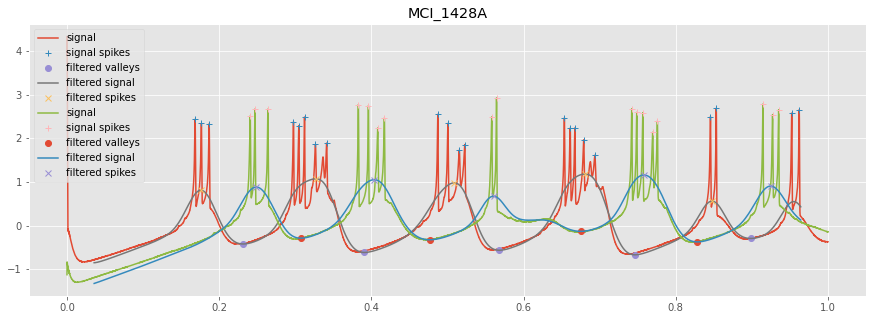

{'group': 'MCI', 'caseid': '1428A', 'pcgl_freq_gamma': 21, 'pcgr_freq_gamma': 17, 'pcgl_freq_theta': 5, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 2.8300116866893577, 'pcgr_amp_gamma': 2.9913553556487957, 'pcgl_amp_theta': 1.4884468575871264, 'pcgr_amp_theta': 1.3425265395190584, 'pcg_delay': -0.0696563720703125}


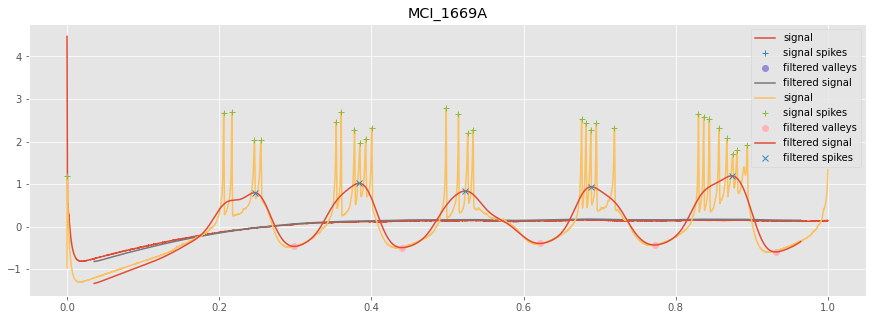

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'MCI', 'caseid': '1669A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 28, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.708256001149885, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 1.5087500702360015, 'pcg_delay': 'N/A'}


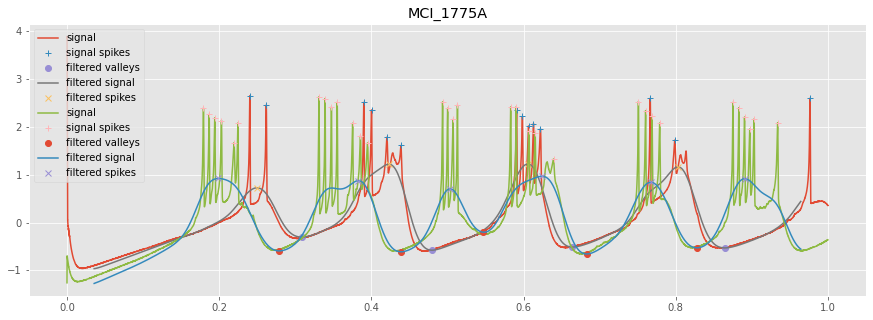

{'group': 'MCI', 'caseid': '1775A', 'pcgl_freq_gamma': 14, 'pcgr_freq_gamma': 32, 'pcgl_freq_theta': 4, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 2.573956655515551, 'pcgr_amp_gamma': 2.6562931541996604, 'pcgl_amp_theta': 1.6205875378510255, 'pcgr_amp_theta': 1.4594143874989647, 'pcg_delay': -0.0929931640625}


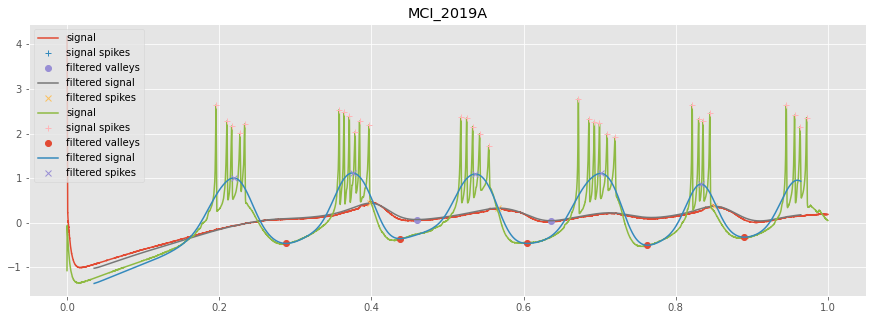

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'MCI', 'caseid': '2019A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 30, 'pcgl_freq_theta': 3, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.8192599252658033, 'pcgl_amp_theta': 0.5939344390767178, 'pcgr_amp_theta': 1.5662844138811003, 'pcg_delay': -0.18565673828125}


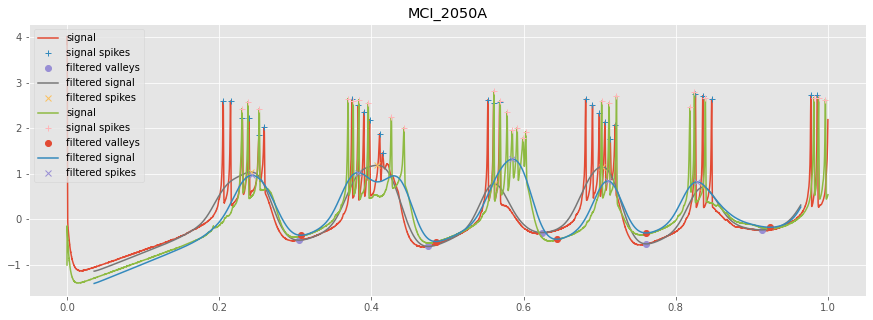

{'group': 'MCI', 'caseid': '2050A', 'pcgl_freq_gamma': 26, 'pcgr_freq_gamma': 25, 'pcgl_freq_theta': 5, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 2.9222432517964263, 'pcgr_amp_gamma': 2.7949925180285327, 'pcgl_amp_theta': 1.488917907100028, 'pcgr_amp_theta': 1.472060671059486, 'pcg_delay': 2.6855468750000004e-05}


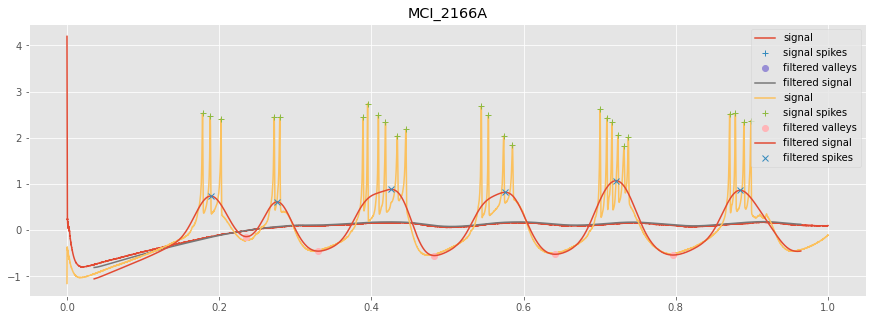

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'MCI', 'caseid': '2166A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 25, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.8628739393097153, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 1.319031242658998, 'pcg_delay': 'N/A'}


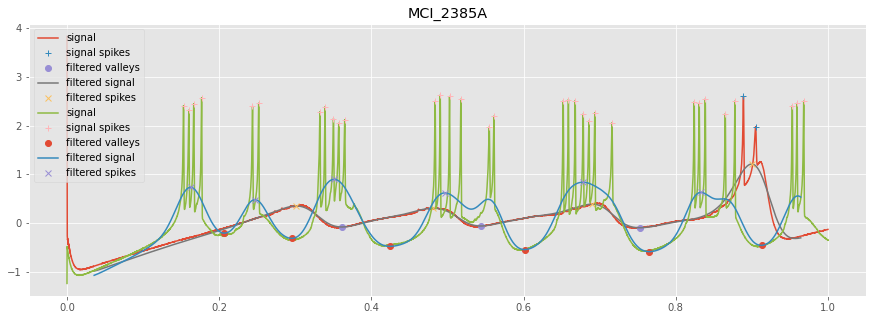

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'MCI', 'caseid': '2385A', 'pcgl_freq_gamma': 2, 'pcgr_freq_gamma': 32, 'pcgl_freq_theta': 4, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.7256184152133365, 'pcgl_amp_theta': 0.577921796842275, 'pcgr_amp_theta': 1.1866402007487309, 'pcg_delay': -0.23745524088541664}


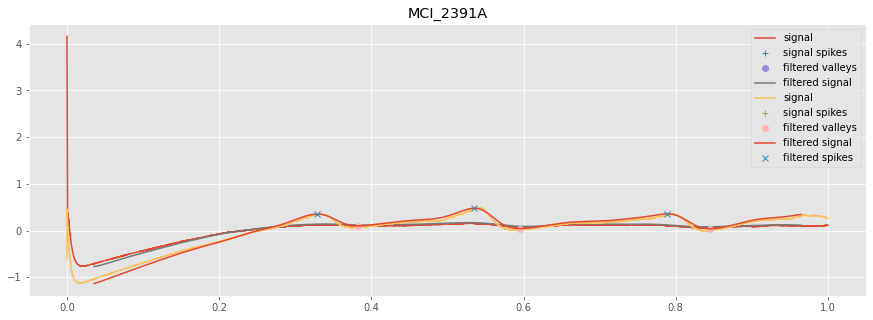

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'MCI', 'caseid': '2391A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 0, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 3, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': nan, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 0.53307680119598, 'pcg_delay': 'N/A'}


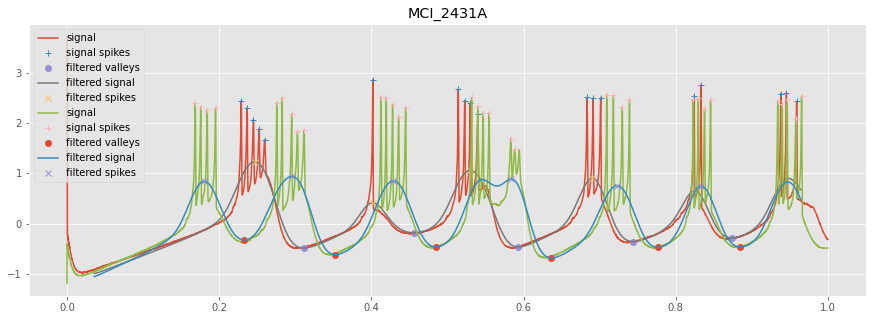

{'group': 'MCI', 'caseid': '2431A', 'pcgl_freq_gamma': 18, 'pcgr_freq_gamma': 33, 'pcgl_freq_theta': 5, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 2.952451210599995, 'pcgr_amp_gamma': 2.6747953722408906, 'pcgl_amp_theta': 1.2806944536954177, 'pcgr_amp_theta': 1.397563542550493, 'pcg_delay': -0.09638427734375}


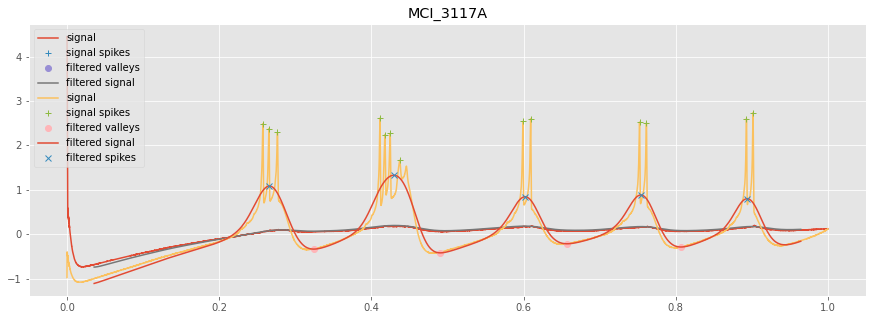

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'MCI', 'caseid': '3117A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 13, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.8654539238549157, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 1.4543497175625508, 'pcg_delay': 'N/A'}


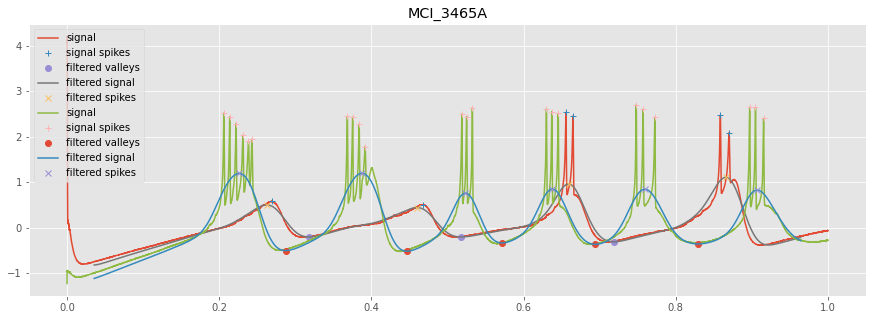

{'group': 'MCI', 'caseid': '3465A', 'pcgl_freq_gamma': 6, 'pcgr_freq_gamma': 22, 'pcgl_freq_theta': 4, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 1.7957148425697977, 'pcgr_amp_gamma': 2.9186007946724986, 'pcgl_amp_theta': 0.9580396197804371, 'pcgr_amp_theta': 1.4623767647317387, 'pcg_delay': -0.08135172526041666}


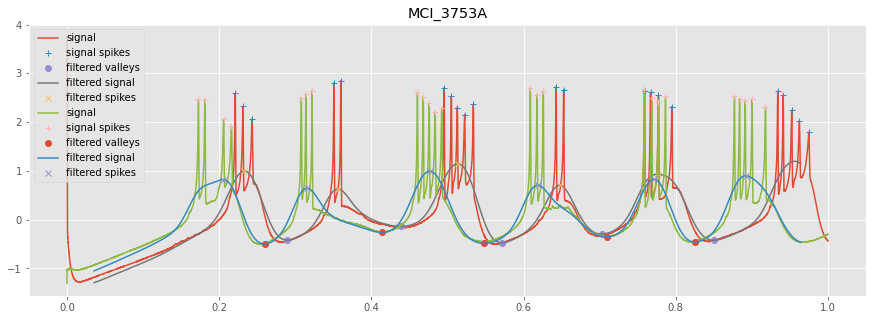

{'group': 'MCI', 'caseid': '3753A', 'pcgl_freq_gamma': 21, 'pcgr_freq_gamma': 24, 'pcgl_freq_theta': 5, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 3.0243564495546775, 'pcgr_amp_gamma': 2.9626510505284367, 'pcgl_amp_theta': 1.3195159342584053, 'pcgr_amp_theta': 1.2727767070383096, 'pcg_delay': -0.02779296875}


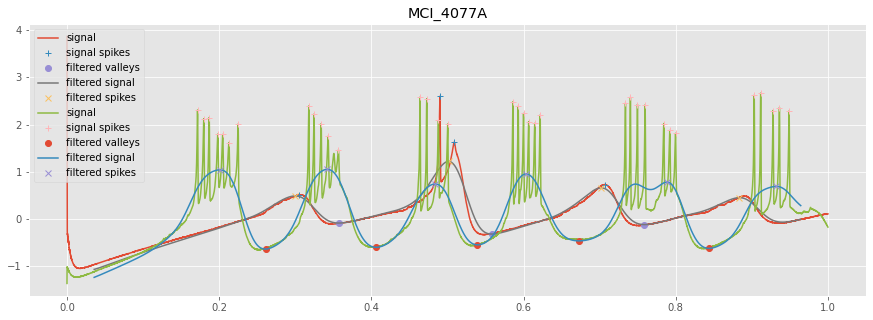

{'group': 'MCI', 'caseid': '4077A', 'pcgl_freq_gamma': 4, 'pcgr_freq_gamma': 34, 'pcgl_freq_theta': 4, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 1.4640120331985507, 'pcgr_amp_gamma': 2.77778629799194, 'pcgl_amp_theta': 1.124111879517083, 'pcgr_amp_theta': 1.5529841559317432, 'pcg_delay': -0.158837890625}


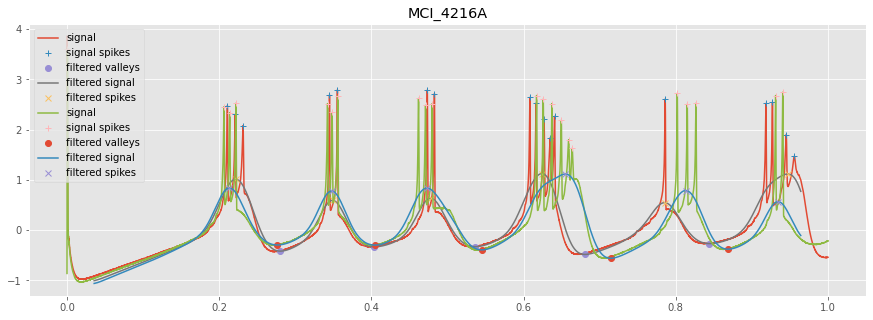

{'group': 'MCI', 'caseid': '4216A', 'pcgl_freq_gamma': 17, 'pcgr_freq_gamma': 21, 'pcgl_freq_theta': 6, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 2.9758869533594057, 'pcgr_amp_gamma': 3.1871938269254745, 'pcgl_amp_theta': 1.2221900800061758, 'pcgr_amp_theta': 1.3256019016570666, 'pcg_delay': 0.00891845703125}


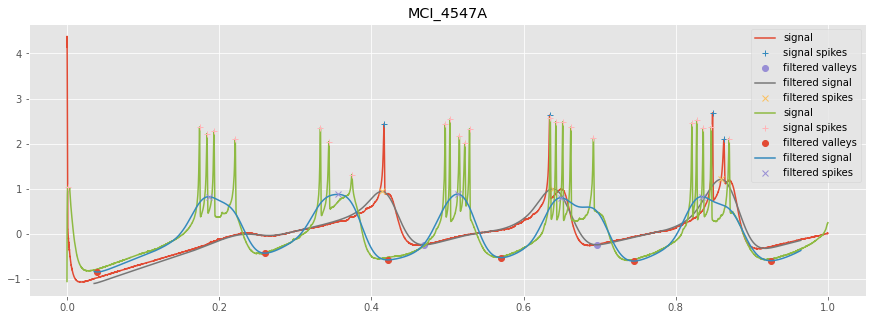

{'group': 'MCI', 'caseid': '4547A', 'pcgl_freq_gamma': 4, 'pcgr_freq_gamma': 23, 'pcgl_freq_theta': 3, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 2.891688246232313, 'pcgr_amp_gamma': 2.4609754686866103, 'pcgl_amp_theta': 1.4279653697783092, 'pcgr_amp_theta': 1.4138468886041493, 'pcg_delay': -0.2549560546875}


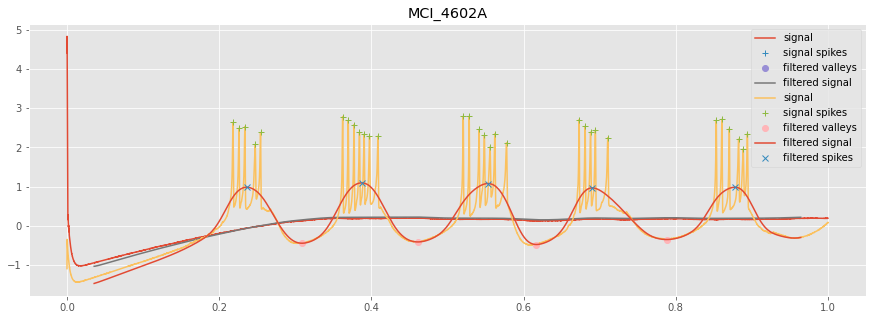

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'MCI', 'caseid': '4602A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 30, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.9472921570516264, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 1.5944055584008865, 'pcg_delay': 'N/A'}


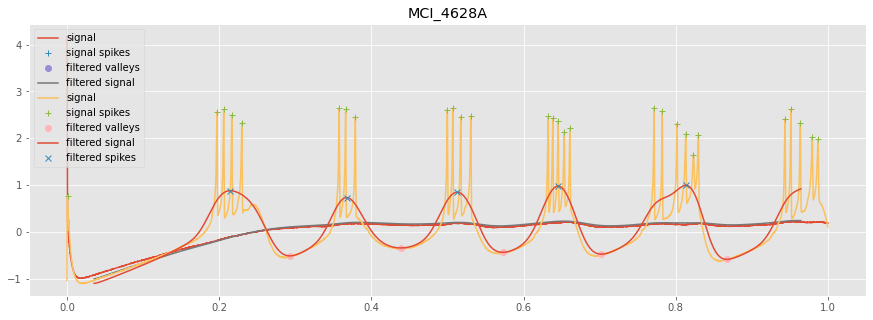

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'MCI', 'caseid': '4628A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 28, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.7845443680772406, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 1.4060966230464076, 'pcg_delay': 'N/A'}


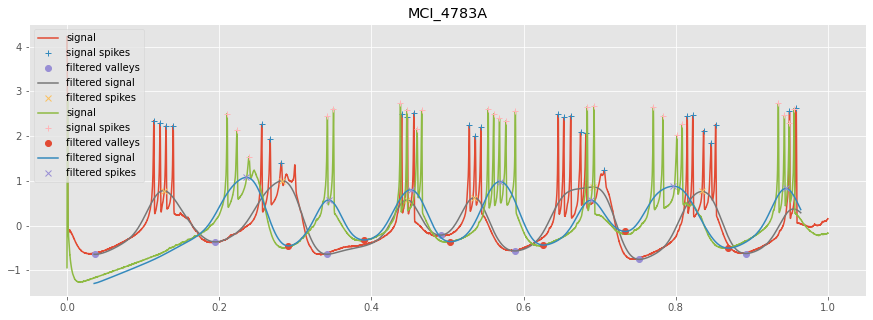

{'group': 'MCI', 'caseid': '4783A', 'pcgl_freq_gamma': 26, 'pcgr_freq_gamma': 25, 'pcgl_freq_theta': 6, 'pcgr_freq_theta': 7, 'pcgl_amp_gamma': 2.723110340135934, 'pcgr_amp_gamma': 3.049062183947077, 'pcgl_amp_theta': 1.2967886784344795, 'pcgr_amp_theta': 1.2474096924402458, 'pcg_delay': -0.02798665364583333}


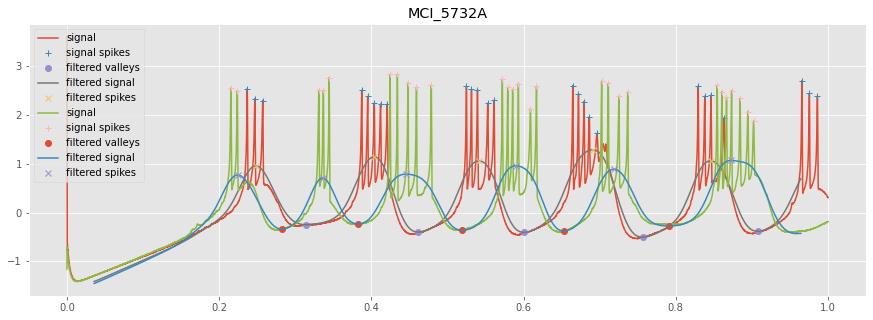

{'group': 'MCI', 'caseid': '5732A', 'pcgl_freq_gamma': 25, 'pcgr_freq_gamma': 27, 'pcgl_freq_theta': 5, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 2.8522616076627676, 'pcgr_amp_gamma': 2.952838541695037, 'pcgl_amp_theta': 1.5941819853610413, 'pcgr_amp_theta': 1.2593627302593409, 'pcg_delay': -0.0832080078125}


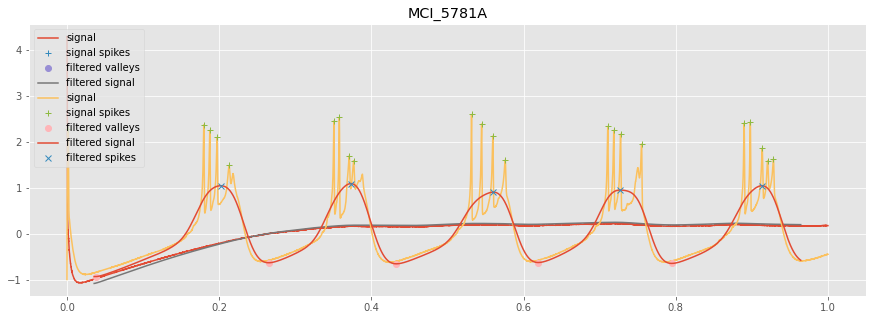

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'MCI', 'caseid': '5781A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 22, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.859309273760064, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 1.6744626503441649, 'pcg_delay': 'N/A'}


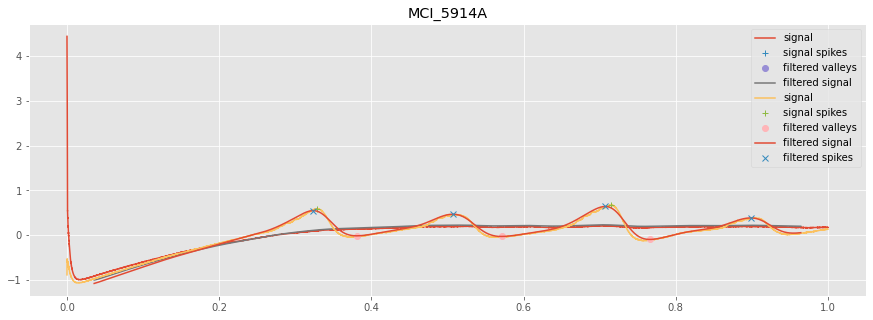

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'MCI', 'caseid': '5914A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 2, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 4, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 0.952304558975902, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 0.7665042682643, 'pcg_delay': 'N/A'}


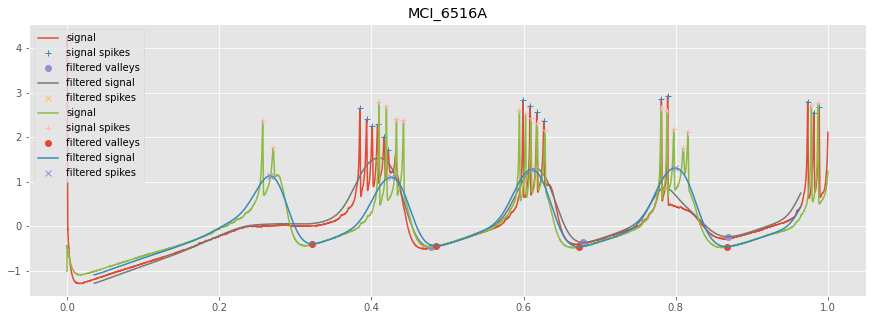

{'group': 'MCI', 'caseid': '6516A', 'pcgl_freq_gamma': 15, 'pcgr_freq_gamma': 18, 'pcgl_freq_theta': 3, 'pcgr_freq_theta': 4, 'pcgl_amp_gamma': 3.1421667785123426, 'pcgr_amp_gamma': 2.8690728694267005, 'pcgl_amp_theta': 1.7646144728692077, 'pcgr_amp_theta': 1.7238053192186755, 'pcg_delay': -0.16948649088541667}


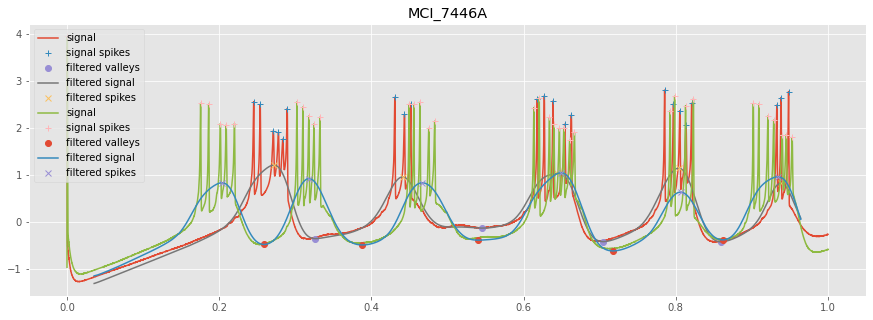

{'group': 'MCI', 'caseid': '7446A', 'pcgl_freq_gamma': 22, 'pcgr_freq_gamma': 35, 'pcgl_freq_theta': 5, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 2.8323804807288795, 'pcgr_amp_gamma': 3.1946094090165444, 'pcgl_amp_theta': 1.531354663349339, 'pcgr_amp_theta': 1.404261447970451, 'pcg_delay': -0.130865478515625}


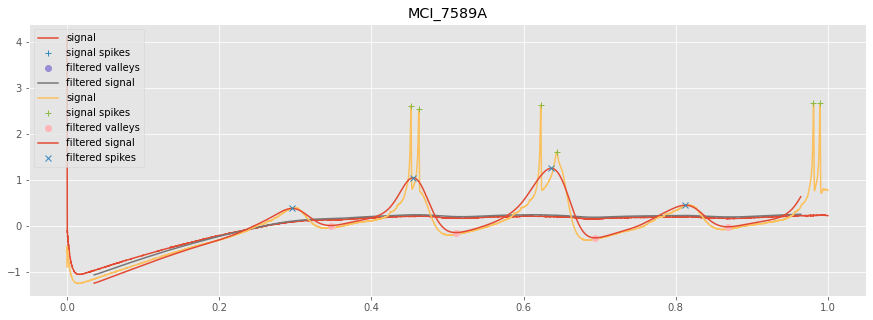

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'MCI', 'caseid': '7589A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 6, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 4, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.539649579693575, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 1.0442663650646966, 'pcg_delay': 'N/A'}


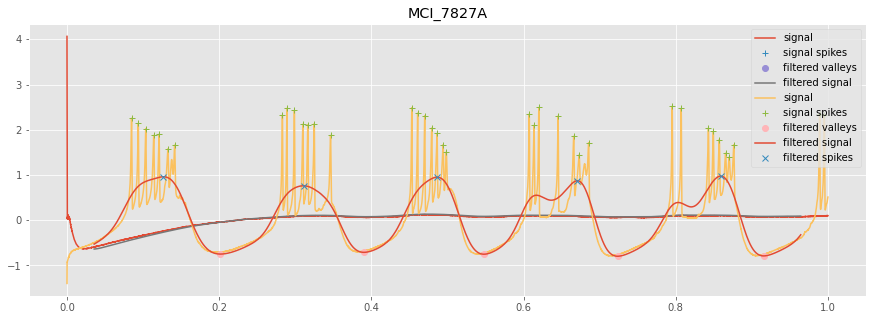

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'MCI', 'caseid': '7827A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 38, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.7382383142580866, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 1.6468349308481045, 'pcg_delay': 'N/A'}


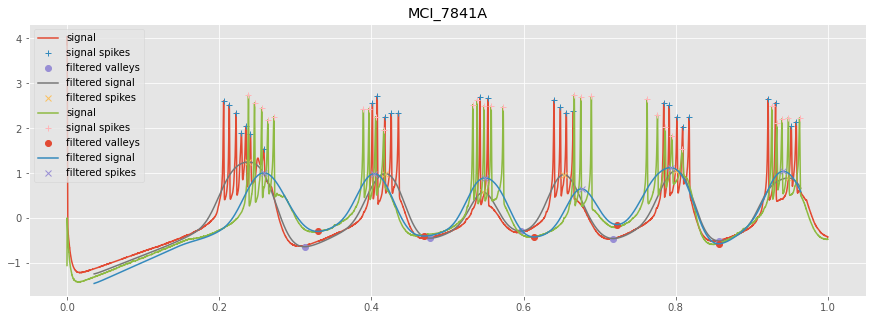

{'group': 'MCI', 'caseid': '7841A', 'pcgl_freq_gamma': 27, 'pcgr_freq_gamma': 27, 'pcgl_freq_theta': 6, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 2.9448656121563017, 'pcgr_amp_gamma': 2.8681398141201058, 'pcgl_amp_theta': 1.5067787873286265, 'pcgr_amp_theta': 1.3881205387924205, 'pcg_delay': -0.004851074218749999}


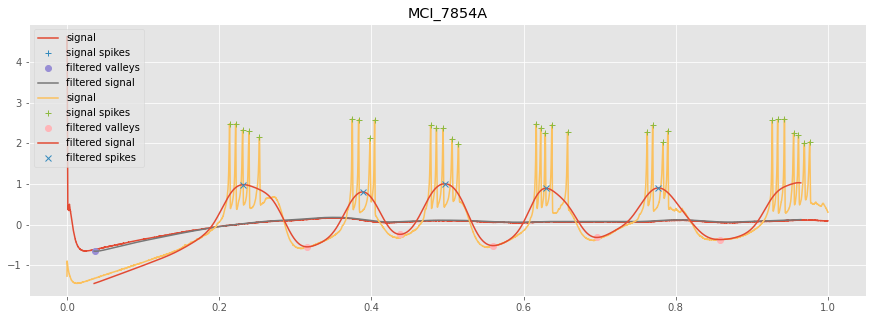

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'MCI', 'caseid': '7854A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 30, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.904418036767831, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 1.4286684702262333, 'pcg_delay': 'N/A'}


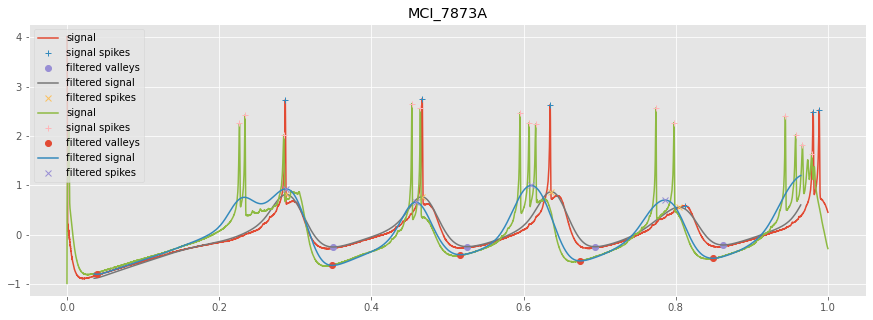

{'group': 'MCI', 'caseid': '7873A', 'pcgl_freq_gamma': 6, 'pcgr_freq_gamma': 15, 'pcgl_freq_theta': 4, 'pcgr_freq_theta': 4, 'pcgl_amp_gamma': 2.5292205439929756, 'pcgr_amp_gamma': 2.7762456760644625, 'pcgl_amp_theta': 1.073772918510579, 'pcgr_amp_theta': 1.3725103945943933, 'pcg_delay': -0.0133331298828125}


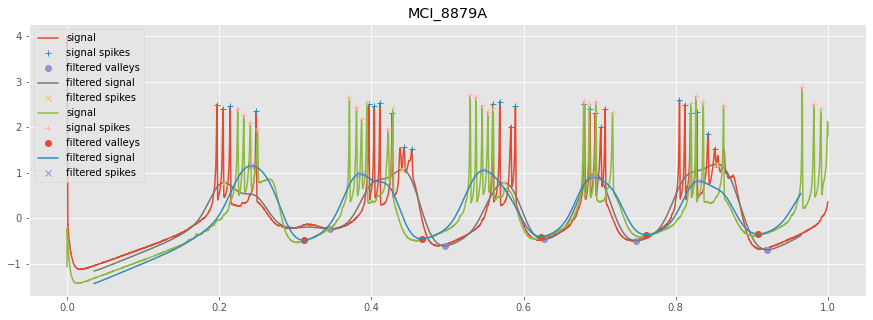

{'group': 'MCI', 'caseid': '8879A', 'pcgl_freq_gamma': 25, 'pcgr_freq_gamma': 26, 'pcgl_freq_theta': 5, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 2.7181669894797635, 'pcgr_amp_gamma': 2.7183936406436, 'pcgl_amp_theta': 1.5076648646840312, 'pcgr_amp_theta': 1.49987666425914, 'pcg_delay': 0.01394287109375}


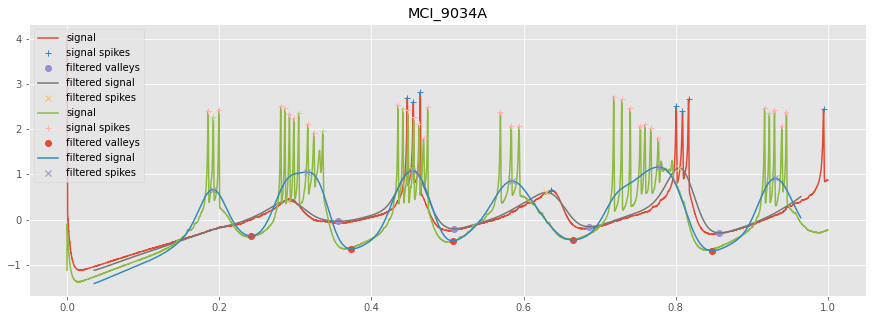

{'group': 'MCI', 'caseid': '9034A', 'pcgl_freq_gamma': 8, 'pcgr_freq_gamma': 33, 'pcgl_freq_theta': 4, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 2.178574531902971, 'pcgr_amp_gamma': 2.8694746436412863, 'pcgl_amp_theta': 1.097742509782179, 'pcgr_amp_theta': 1.5627441569847433, 'pcg_delay': -0.1580352783203125}


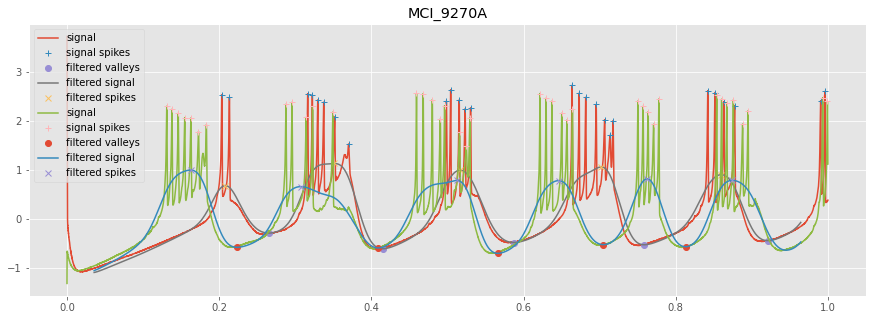

{'group': 'MCI', 'caseid': '9270A', 'pcgl_freq_gamma': 26, 'pcgr_freq_gamma': 39, 'pcgl_freq_theta': 5, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 2.9306304160778236, 'pcgr_amp_gamma': 2.756002251844542, 'pcgl_amp_theta': 1.4928003555057945, 'pcgr_amp_theta': 1.456519415078017, 'pcg_delay': -0.04952392578125}


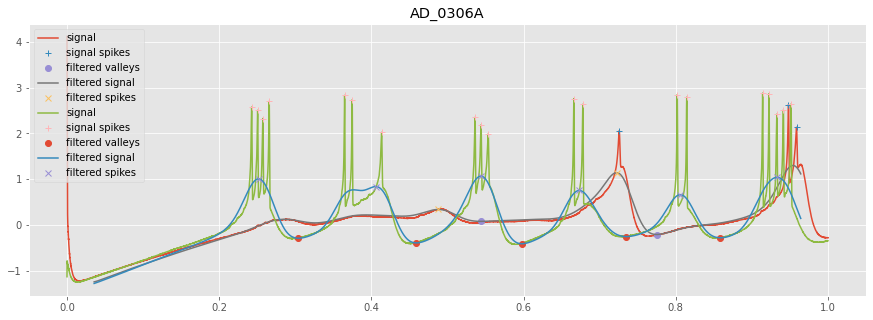

{'group': 'AD', 'caseid': '0306A', 'pcgl_freq_gamma': 3, 'pcgr_freq_gamma': 19, 'pcgl_freq_theta': 2, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 2.1606604973283705, 'pcgr_amp_gamma': 2.7891538148138735, 'pcgl_amp_theta': 1.0651184356691958, 'pcgr_amp_theta': 1.2922060495734007, 'pcg_delay': -0.276470947265625}


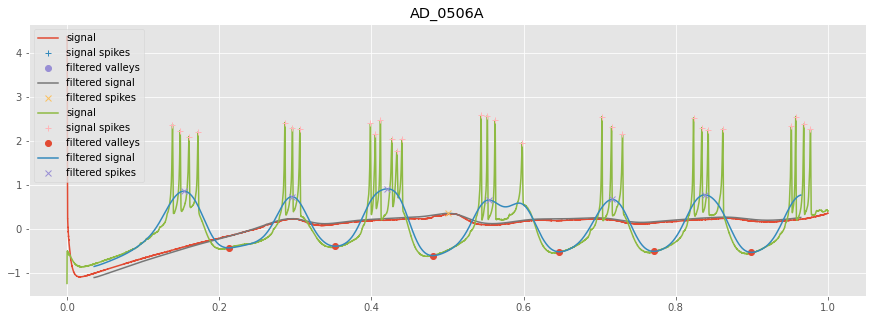

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'AD', 'caseid': '0506A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 28, 'pcgl_freq_theta': 1, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.7134866832775697, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 1.294821683678184, 'pcg_delay': nan}


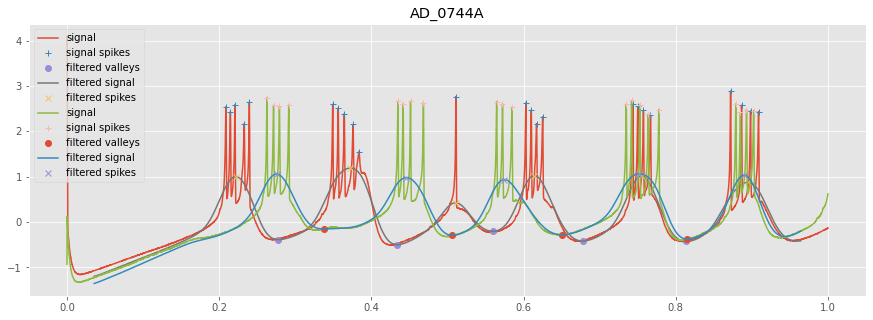

{'group': 'AD', 'caseid': '0744A', 'pcgl_freq_gamma': 23, 'pcgr_freq_gamma': 20, 'pcgl_freq_theta': 6, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 2.9524084199164595, 'pcgr_amp_gamma': 2.9790411669476513, 'pcgl_amp_theta': 1.3964052406849765, 'pcgr_amp_theta': 1.4089994218953088, 'pcg_delay': -0.0822998046875}


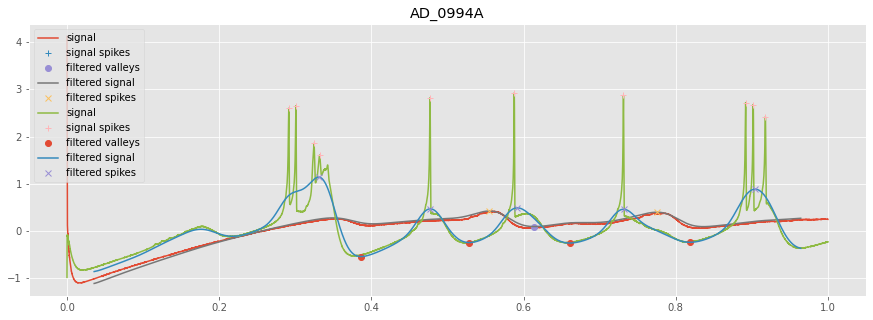

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'AD', 'caseid': '0994A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 10, 'pcgl_freq_theta': 2, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 3.0061204778191613, 'pcgl_amp_theta': 0.9384126571121177, 'pcgr_amp_theta': 1.040855930050268, 'pcg_delay': -0.2244384765625}


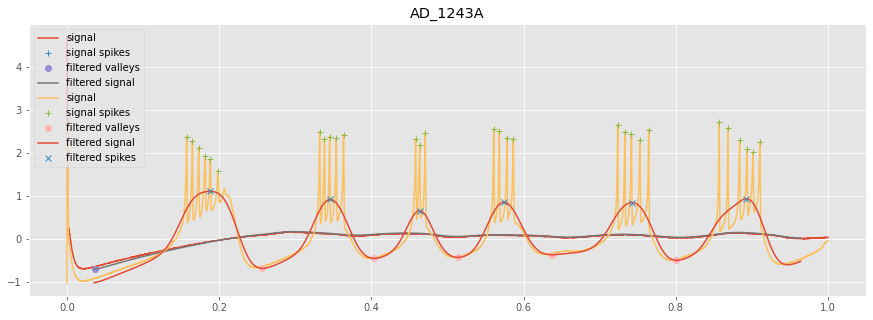

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'AD', 'caseid': '1243A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 30, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.9846823175039137, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 1.4136501091115388, 'pcg_delay': 'N/A'}


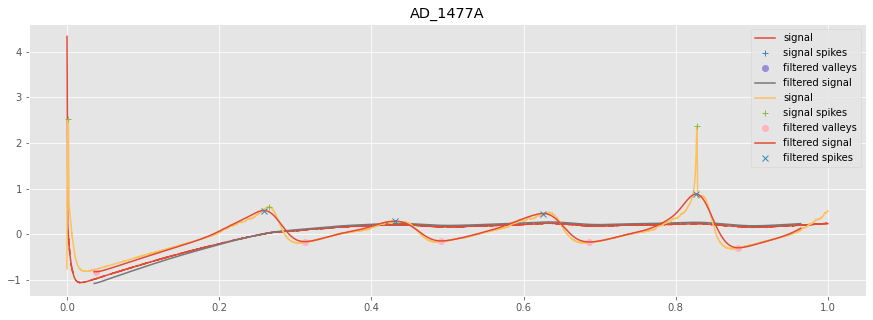

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'AD', 'caseid': '1477A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 3, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 4, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.348111138886963, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 0.7963702065592888, 'pcg_delay': 'N/A'}


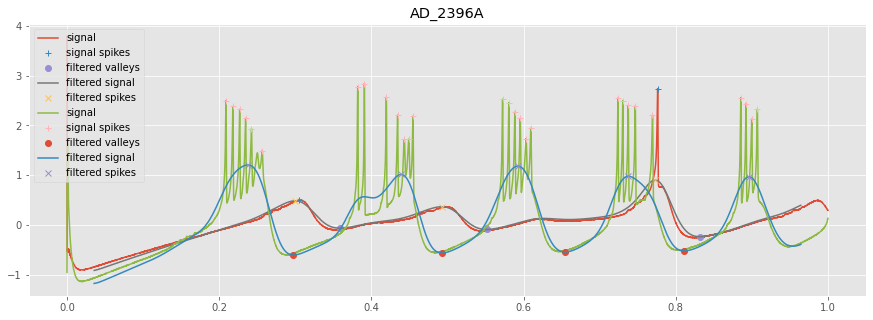

{'group': 'AD', 'caseid': '2396A', 'pcgl_freq_gamma': 2, 'pcgr_freq_gamma': 29, 'pcgl_freq_theta': 3, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 1.966095091295438, 'pcgr_amp_gamma': 2.79178457538464, 'pcgl_amp_theta': 0.8304859627731375, 'pcgr_amp_theta': 1.737477930696807, 'pcg_delay': -0.09861653645833333}


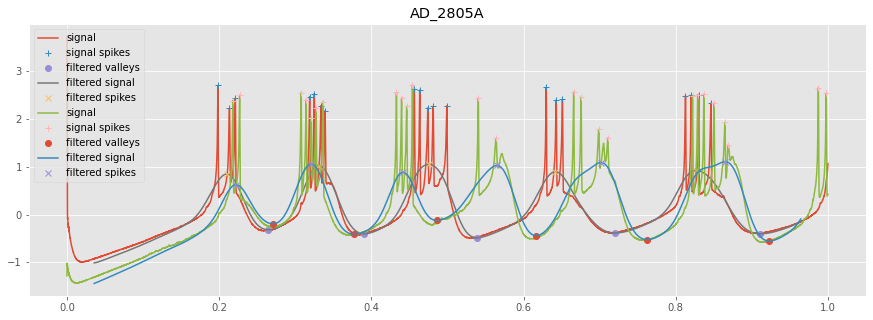

{'group': 'AD', 'caseid': '2805A', 'pcgl_freq_gamma': 19, 'pcgr_freq_gamma': 25, 'pcgl_freq_theta': 5, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 2.902052295773257, 'pcgr_amp_gamma': 2.759857286783086, 'pcgl_amp_theta': 1.4109537963847856, 'pcgr_amp_theta': 1.416648870090726, 'pcg_delay': 0.046794433593750004}


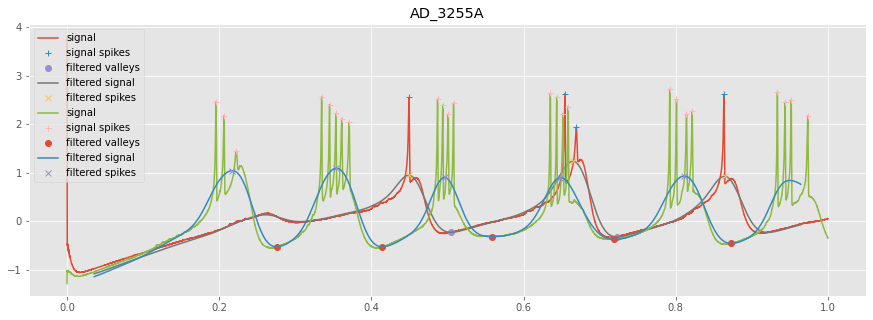

{'group': 'AD', 'caseid': '3255A', 'pcgl_freq_gamma': 4, 'pcgr_freq_gamma': 24, 'pcgl_freq_theta': 3, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 2.897771681924178, 'pcgr_amp_gamma': 2.8458994435979372, 'pcgl_amp_theta': 1.5618910442666758, 'pcgr_amp_theta': 1.4866566345461913, 'pcg_delay': -0.27139892578125}


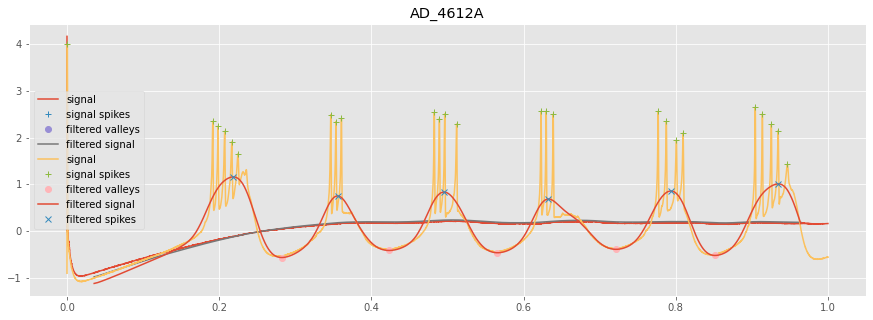

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'AD', 'caseid': '4612A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 25, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 3.2115974264988405, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 1.3924787351667973, 'pcg_delay': 'N/A'}


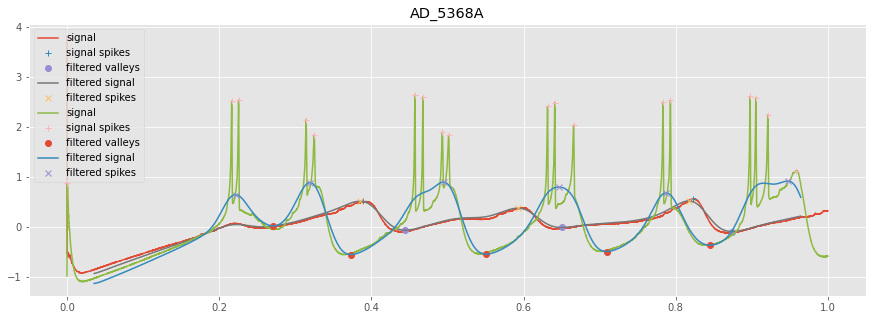

{'group': 'AD', 'caseid': '5368A', 'pcgl_freq_gamma': 2, 'pcgr_freq_gamma': 18, 'pcgl_freq_theta': 3, 'pcgr_freq_theta': 6, 'pcgl_amp_gamma': 0.827629071175515, 'pcgr_amp_gamma': 2.6447949319806106, 'pcgl_amp_theta': 0.6679122317700067, 'pcgr_amp_theta': 1.2449464054238137, 'pcg_delay': -0.25290934244791663}


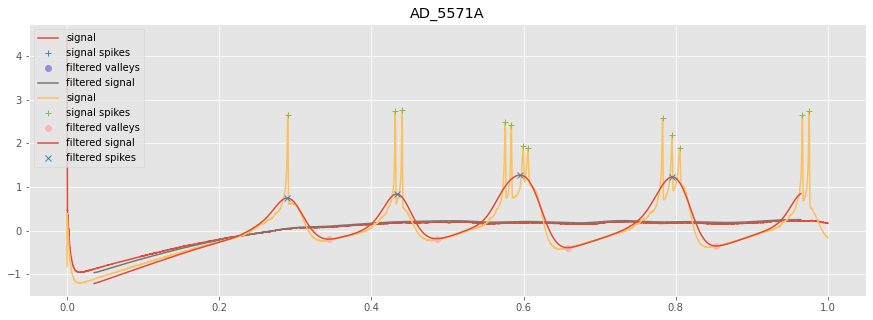

/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wayne/spack/opt/spack/linux-ubuntu20.04-skylake/gcc-9.3.0/miniconda3-4.8.2-fpigr2ctupyscbfgh2anqd2nlmukiwbf/envs/tvbenv/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'group': 'AD', 'caseid': '5571A', 'pcgl_freq_gamma': 0, 'pcgr_freq_gamma': 12, 'pcgl_freq_theta': 0, 'pcgr_freq_theta': 4, 'pcgl_amp_gamma': nan, 'pcgr_amp_gamma': 2.8725176157943992, 'pcgl_amp_theta': nan, 'pcgr_amp_theta': 1.4113414011348822, 'pcg_delay': 'N/A'}


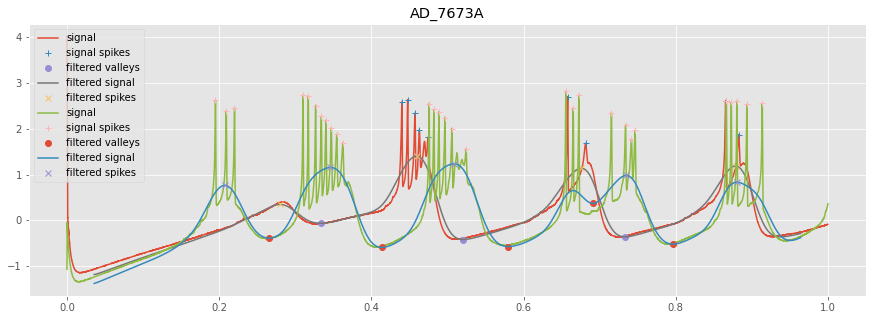

{'group': 'AD', 'caseid': '7673A', 'pcgl_freq_gamma': 9, 'pcgr_freq_gamma': 29, 'pcgl_freq_theta': 4, 'pcgr_freq_theta': 5, 'pcgl_amp_gamma': 2.5680887094949996, 'pcgr_amp_gamma': 2.8412655706184253, 'pcgl_amp_theta': 1.3827707036284744, 'pcgr_amp_theta': 1.5437385669152754, 'pcg_delay': -0.11790771484375}


In [3]:
#%matplotlib widget
# print(coData)
# read_data('NC', "0591A")
# df = pd.DataFrame(columns=["group", "caseid", "pcg_left_power", "pcg_right_power"])
for grp, caseid in zip(coData.groups, coData.index):
    print(read_data(grp, caseid))
#     df = pd.concat([df, pd.DataFrame.from_records([{"group": grp, "caseid":caseid,"pcg_left_power":pcgl, "pcg_right_power": pcgr}])], ignore_index = True)
# df.to_excel('/mnt/c/Users/wayne/tvb/psd_data.xlsx')